# Online Payments Fraud Detection

## libraries & dataset

In [77]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
#import dataset
paymant_df = pd.read_csv("../data/payments_log.csv")
paymant_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [79]:
paymant_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [80]:
paymant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrig  1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


as you see our dataset doesn't have null value, so we go to next step

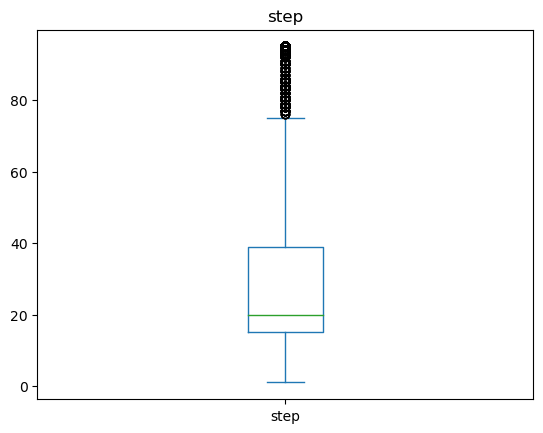

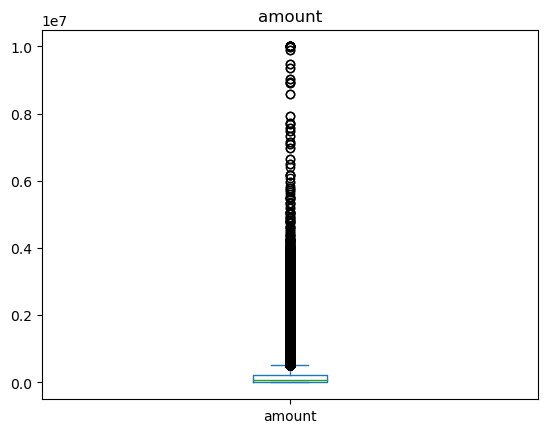

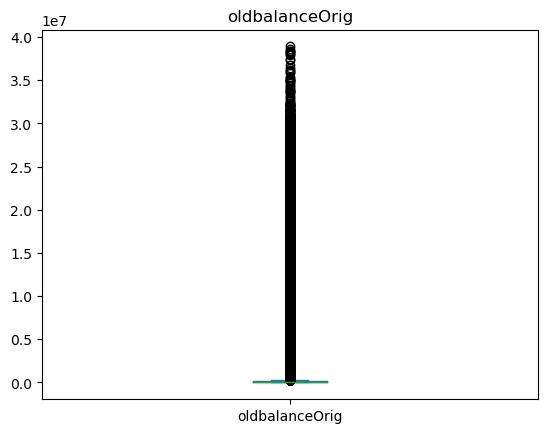

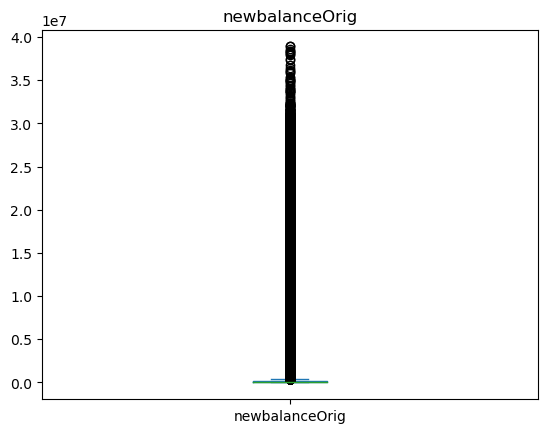

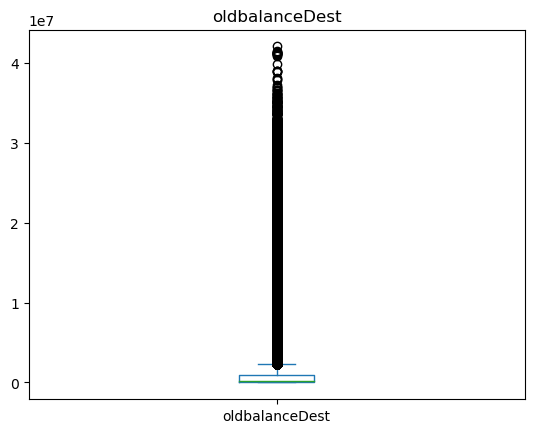

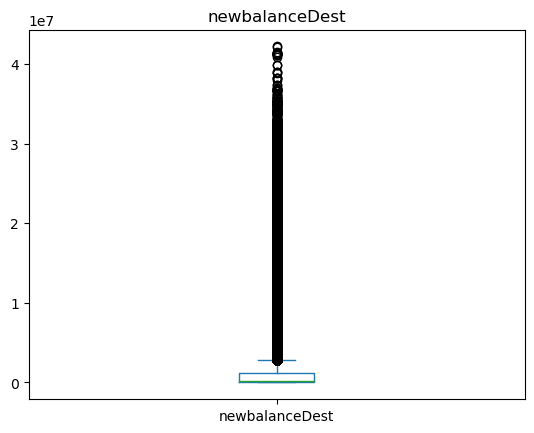

In [81]:
for col in paymant_df.columns.drop([ "type" ,"nameOrig", "nameDest", "isFraud"]):
    paymant_df[col].plot(kind= "box" , title= col)
    plt.show()

In [82]:
#split names 
paymant_df["nameOrig_num"] = paymant_df["nameOrig"].str[1:]
paymant_df["nameOrig_alpha"] = paymant_df["nameOrig"].str[0]

paymant_df["nameDest_num"] =paymant_df["nameDest"].str[1:]
paymant_df["nameDest_alpha"] =paymant_df["nameDest"].str[0]

paymant_df.drop(["nameOrig", "nameDest"] , axis=1 , inplace=True)

In [83]:
#one hot Type col
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

v_tmp = ohe.fit_transform(paymant_df[["type"]],).toarray()
l_tmp = ohe.get_feature_names_out()
paymant_df =pd.concat([paymant_df , pd.DataFrame(columns=l_tmp ,data=v_tmp,dtype=int)],axis=1)
paymant_df.drop(["type"] , axis=1 , inplace=True)

v_tmp = ohe.fit_transform(paymant_df[["nameDest_alpha"]],).toarray()
l_tmp = ohe.get_feature_names_out()
paymant_df =pd.concat([paymant_df , pd.DataFrame(columns=l_tmp ,data=v_tmp,dtype=int)],axis=1)

v_tmp = ohe.fit_transform(paymant_df[["nameOrig_alpha"]],).toarray()
l_tmp = ohe.get_feature_names_out()
paymant_df =pd.concat([paymant_df , pd.DataFrame(columns=l_tmp ,data=v_tmp,dtype=int)],axis=1)


paymant_df.drop(["nameDest_alpha" , "nameOrig_alpha"] , axis=1 , inplace=True)


In [84]:
paymant_df

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameOrig_num,nameDest_num,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_alpha_C,nameDest_alpha_M,nameOrig_alpha_C
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,1231006815,1979787155,0,0,0,1,0,0,1,1
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,1666544295,2044282225,0,0,0,1,0,0,1,1
2,1,181.00,181.00,0.00,0.00,0.00,1,1305486145,553264065,0,0,0,0,1,1,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,840083671,38997010,0,1,0,0,0,1,0,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,2048537720,1230701703,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1179511630,435674507,0,1,0,0,0,1,0,1
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,1956161225,668364942,0,0,0,1,0,0,1,1
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,2037964975,1355182933,0,0,0,1,0,0,1,1
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,1633237354,1964992463,0,0,0,1,0,0,1,1


In [85]:
#scaled numerical cols
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

paymant_df["scaled_amount"] = mms.fit_transform(paymant_df[["amount"]])

paymant_df["scaled_oldBalanceOrig"] = mms.fit_transform(paymant_df[["oldbalanceOrig"]])
paymant_df["scaled_oldBalanceDest"] = mms.fit_transform(paymant_df[["oldbalanceDest"]])

paymant_df["scaled_newBalanceOrig"] = mms.fit_transform(paymant_df[["newbalanceOrig"]])
paymant_df["scaled_newBalanceDest"] = mms.fit_transform(paymant_df[["newbalanceDest"]])

paymant_df.drop(["amount", "oldbalanceOrig", "oldbalanceDest", "newbalanceOrig", "newbalanceDest"] , axis=1 , inplace=True)

In [86]:
paymant_df

,step,isFraud,nameOrig_num,nameDest_num,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_alpha_C,nameDest_alpha_M,nameOrig_alpha_C,scaled_amount,scaled_oldBalanceOrig,scaled_oldBalanceDest,scaled_newBalanceOrig,scaled_newBalanceDest
0,1,0,1231006815,1979787155,0,0,0,1,0,0,1,1,0.000984,0.004374,0.000000,0.004121,0.000000
1,1,0,1666544295,2044282225,0,0,0,1,0,0,1,1,0.000186,0.000546,0.000000,0.000498,0.000000
2,1,1,1305486145,553264065,0,0,0,0,1,1,0,1,0.000018,0.000005,0.000000,0.000000,0.000000
3,1,1,840083671,38997010,0,1,0,0,0,1,0,1,0.000018,0.000005,0.000503,0.000000,0.000000
4,1,0,2048537720,1230701703,0,0,0,1,0,0,1,1,0.001167,0.001068,0.000000,0.000768,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,0,1179511630,435674507,0,1,0,0,0,1,0,1,0.013256,0.012334,0.011504,0.008927,0.014618
1048571,95,0,1956161225,668364942,0,0,0,1,0,0,1,1,0.000992,0.002328,0.000000,0.002073,0.000000
1048572,95,0,2037964975,1355182933,0,0,0,1,0,0,1,1,0.001414,0.000528,0.000000,0.000165,0.000000
1048573,95,0,1633237354,1964992463,0,0,0,1,0,0,1,1,0.001002,0.002329,0.000000,0.002072,0.000000


<Axes: ylabel='isFraud'>

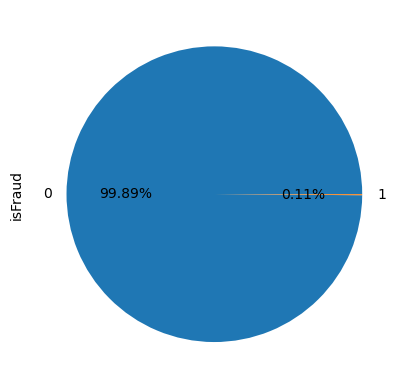

In [87]:
paymant_df["isFraud"].value_counts().plot(kind= "pie", autopct = '%1.2f%%')

In [97]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(paymant_df.drop(["isFraud"] , axis=1) , paymant_df["isFraud"] , test_size=0.1, random_state=1)
X_train

,step,nameOrig_num,nameDest_num,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_alpha_C,nameDest_alpha_M,nameOrig_alpha_C,scaled_amount,scaled_oldBalanceOrig,scaled_oldBalanceDest,scaled_newBalanceOrig,scaled_newBalanceDest
596623,33,1165222769,874496726,1,0,0,0,0,1,0,1,0.034096,0.240375,0.094793,0.249140,0.086489
268403,15,1223581099,1726390215,0,0,0,1,0,0,1,1,0.001969,0.000002,0.000000,0.000000,0.000000
545153,21,763677422,1493617119,1,0,0,0,0,1,0,1,0.040519,0.026372,0.065120,0.036788,0.055364
824854,41,1479172769,1480077154,0,1,0,0,0,1,0,1,0.018958,0.010287,0.000314,0.005414,0.006127
297530,15,1894395481,1376668958,0,0,0,1,0,0,1,1,0.002259,0.002041,0.000000,0.001460,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,19,844483446,556812393,0,1,0,0,0,1,0,1,0.014075,0.000000,0.044671,0.000000,0.047900
791624,40,1549762060,720877627,0,0,0,1,0,0,1,1,0.002180,0.000000,0.000000,0.000000,0.000000
470924,19,2131990303,1877598190,0,0,0,1,0,0,1,1,0.001726,0.000305,0.000000,0.000000,0.000000
491755,19,49732332,1828826032,0,1,0,0,0,1,0,1,0.027391,0.000776,0.000000,0.000000,0.006491


In [94]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy= "minority" ,k_neighbors=4, random_state= 1)
X_train , y_train = sm.fit_resample(X_train , y_train)

<Axes: ylabel='isFraud'>

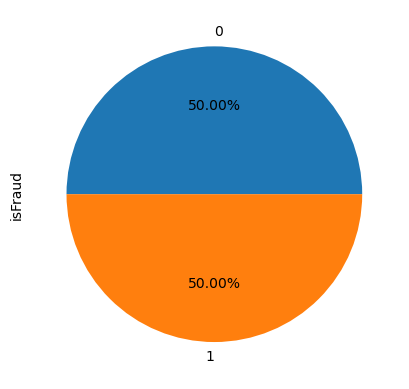

In [90]:
y_train.value_counts().plot(kind= "pie", autopct = '%1.2f%%')

In [98]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9994945545404261
